In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = load_breast_cancer()
df_cancer_features = pd.DataFrame(data = df.data,
                       columns = df.feature_names)

df_cancer_target = pd.DataFrame(data = df.target,
                       columns = ['target'])


In [4]:
df_cancer_features.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_cancer_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:

X_train, X_test, y_train, y_test = train_test_split( df_cancer_features,df_cancer_target, test_size=1/3, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn import metrics


In [9]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
a_score



0.9263157894736842

### Adaboost estimator


In [13]:
estimators = list(range(1,100,2))

accuracy_scores=[]
for e in estimators:
    adbclassifier= AdaBoostClassifier(decision_tree, e)
    adbclassifier.fit(X_train,y_train)
    y_pred = adbclassifier.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy_scores.append(score)
    

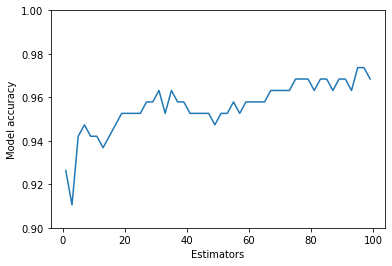

In [14]:
import matplotlib.pyplot as plt

plt.plot(estimators, accuracy_scores)
plt.xlabel('Estimators')
plt.ylabel('Model accuracy')
plt.ylim([0.9, 1])
plt.show()


### Bagging Classifier

In [15]:
estimators = list(range(1,100,2))

accuracy_scores=[]
for e in estimators:
    baggingclassifier= BaggingClassifier(decision_tree, e)
    baggingclassifier.fit(X_train,y_train)
    y_pred = baggingclassifier.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy_scores.append(score)


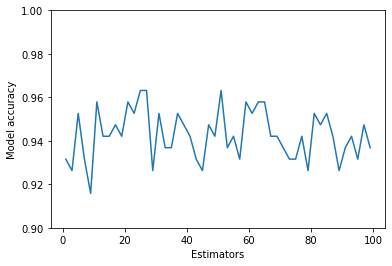

In [16]:
import matplotlib.pyplot as plt

plt.plot(estimators, accuracy_scores)
plt.xlabel('Estimators')
plt.ylabel('Model accuracy')
plt.ylim([0.9, 1])
plt.show()
